In [1]:
import cv2
import dlib
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd

In [2]:
### 人脸检测
facerec = dlib.face_recognition_model_v1("data/data_dlib/dlib_face_recognition_resnet_model_v1.dat")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('data/data_dlib/shape_predictor_68_face_landmarks.dat')

In [3]:
def face_detect(faces, ori_face):
    if len(faces) != 0:
        for i in range(len(faces)):
            # draw rectangle
            for kk, d in enumerate(faces):
                # 绘制矩形框
                cv2.rectangle(ori_face, tuple([d.left(), d.top()]), tuple([d.right(), d.bottom()]), (0, 255, 255), 2)
                plt.imshow(ori_face)
    else:
        print('未检测到人脸')

In [4]:
def face_feature_point(faces, ori_face):
    if len(faces) != 0:
        for i in range(len(faces)):
            shape = predictor(ori_face, faces[i])
            
            # face_descriptor = facerec.compute_face_descriptor(ori_face, shape)
            # print(face_descriptor)
            # 特征点显示
            for index, pt in enumerate(shape.parts()):
                pt_pos = (pt.x, pt.y)
                cv2.circle(ori_face, pt_pos, 1, (255, 0, 0), 2)
                # 利用cv2.putText输出1-68
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(ori_face, str(index + 1), pt_pos, font, 0.3, (100, 100, 100), 1, cv2.LINE_AA)
                plt.imshow(ori_face)
    else:
        print('未检测到人脸')

In [5]:
path = './wbb.jpg'

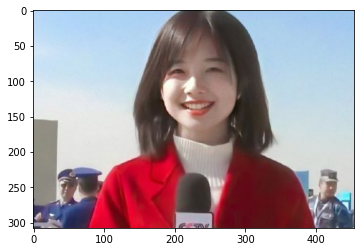

In [6]:
img = cv2.imread(path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [7]:
faces = detector(img_rgb, 1)

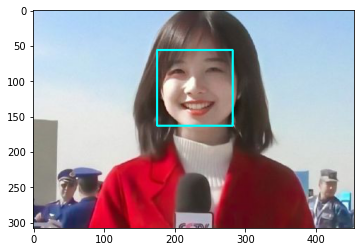

In [8]:
face_detect(faces, img_rgb)

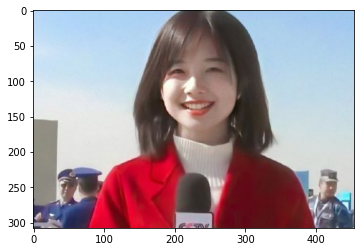

In [9]:
img = cv2.imread(path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

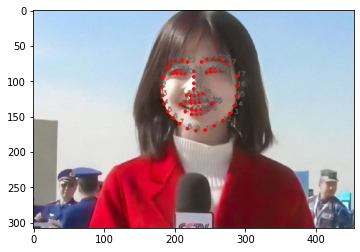

In [10]:
face_feature_point(faces, img_rgb)

In [11]:
### 人脸识别

In [12]:
# compute the e-distance between two 128D features
def return_euclidean_distance(feature_1, feature_2):
    feature_1 = np.array(feature_1)
    feature_2 = np.array(feature_2)
    dist = np.sqrt(np.sum(np.square(feature_1 - feature_2)))
    return dist

In [13]:
def face_recognition(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector(img_rgb, 1)
    shape = predictor(img_rgb, faces[0])
    face_descriptor = facerec.compute_face_descriptor(img_rgb, shape)
    # 处理存放所有人脸特征的 csv
    path_features_known_csv = "data/features_all.csv"
    csv_rd = pd.read_csv(path_features_known_csv, header=None)
    e_distance_list = []
    for i in range(csv_rd.shape[0]):
        name = csv_rd.loc[i][0]
        feature = list(csv_rd.loc[i][1:])
        e_distance_tmp = return_euclidean_distance(face_descriptor, feature)
        e_distance_list.append(e_distance_tmp)
    similar_person_num = e_distance_list.index(min(e_distance_list))
    if min(e_distance_list) < 0.4:
        print('name:', csv_rd.loc[similar_person_num][0], 'prob:', 1-min(e_distance_list))
    else:
        print("Unknown person")

In [14]:
### 随机识别
dir = './face'
name = os.listdir(dir)
face_path = os.path.join(dir, np.random.choice(name))

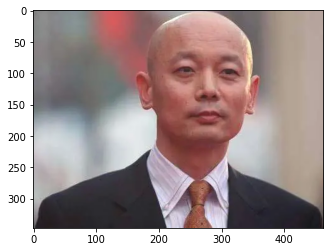

In [15]:
### 展示图片
img = cv2.imread(face_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [ ]:
face_recognition(face_path)